In [2]:
#import libraries

from __future__ import absolute_import
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.misc
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import folium
from folium.plugins import HeatMap
import cv2
from sklearn.cluster import MiniBatchKMeans

In [3]:
data = pd.read_csv('parkingtickets-latlong.csv')

In [4]:
data.head

<bound method NDFrame.head of        Unnamed: 0      NUMBER        DATE   TIME       PLATE   INFO  \
0               0  1000052785  2015-01-01  17:03  MA BC7862   PAN     
1               1  1000016029  2015-01-02  05:05  MA 984NW3   PAN     
2               2  1000016038  2015-01-02  05:08  MA 61EG43   PAN     
3               3  1000016047  2015-01-02  05:12  MA LV67609  PAN     
4               4  1000016056  2015-01-02  05:15  MA 991LA1   PAN     
...           ...         ...         ...    ...         ...    ...   
18266       18266  3608007625  2020-07-01  09:33  MA 4BA352   PAN R   
18267       18267  3608007633  2020-07-01  10:25  NH 3868580  PAN     
18268       18268  3608007635  2020-07-01  10:28  MA 1RBM48   PAN R   
18269       18269  3608007639  2020-07-01  10:38  MA 7TL796   PAN R   
18270       18270  3608007646  2020-07-01  11:06  MA 1NB692   PAN R   

           VEHICLE                    LOCATION  BADGE VIOCODES  FINE  \
0      BMW   RD     WALGREEN`S               

In [5]:
def generateBaseMap(default_location=[42.408428, -71.011993]):
    base_map = folium.Map(location=default_location)
    return(base_map)

In [6]:
data2 = data[data['Lat'].notnull()]
data2 = data2[data2['Long'].notnull()]

In [7]:
data2.VIOCODES.unique()

array(['29', '15', '35', '31', '34', '17', '13', '33', '20', '30', '1',
       '9', nan, '26', '27', '8', '11', '36', '0', '3', '18', '14', '23',
       '25', '6', '21', '2', '4', '38', '24', '32', '28', '5', '10', '19',
       '13  18', '20  34'], dtype=object)

In [8]:
base_map=generateBaseMap() #all parking points
locations = data2[['Lat', 'Long']] #add points on map
code = data2['VIOCODES']
locationlist = locations.values.tolist()

for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], radius=.5).add_to(base_map)
base_map.save('revereparking1.html')

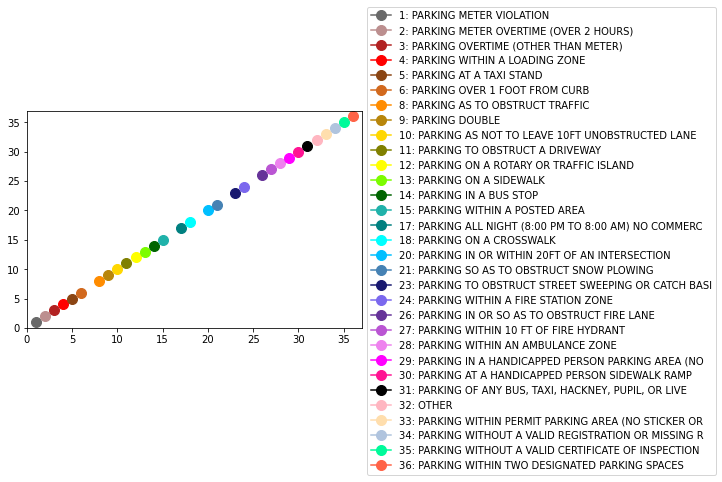

In [9]:
colrs = {'1':'dimgray','2':'rosybrown','3':'firebrick','4':'red','5':'saddlebrown','6':'chocolate','8':'darkorange',
         '9':'darkgoldenrod','10':'gold','11':'olive','12':'yellow','13':'lawngreen','14':'darkgreen','15':'lightseagreen',
         '17':'teal','18':'cyan','20':'deepskyblue','21':'steelblue','23':'midnightblue','24':'mediumslateblue',
         '26':'rebeccapurple','27':'mediumorchid','28':'violet','29':'magenta','30':'deeppink','31':'black',
         '32':'lightpink','33':'navajowhite','34':'lightsteelblue','35':'mediumspringgreen','36':'tomato'}
viocodes = pd.read_csv('Parkingviolationcodes.csv')
viocodes['Reason'] = viocodes['Code'].astype(str) + ': ' + viocodes['Reason']
plt.xlim(0, 37)
plt.ylim(0,37)
for i in range(1, 37):
    if str(i) in colrs.keys():
        plt.plot(i, i, color=colrs.get(str(i)),  marker='o', markersize='10')
plt.legend(viocodes['Reason'], bbox_to_anchor=(1, 1.5), loc='upper left')

In [10]:
base_map=generateBaseMap() #just parking meters
array = ['1', '2']
data4 = data2.loc[data2['VIOCODES'].isin(array)]
locations = data4[['Lat', 'Long']] #add points on map
code = data4['VIOCODES']
locationlist = locations.values.tolist()

for point in range(0, len(locationlist)):
    try:
        code[point]
    except:
        continue
    folium.CircleMarker(locationlist[point], radius=3, weight=1, color='black', fill=True, 
                        fill_color=colrs.get(code[point]), fill_opacity=1).add_to(base_map)
base_map.save('revereparking2.html')

In [11]:
base_map=generateBaseMap() #no parking meters
col = [*colrs]
data4 = data2[data['VIOCODES'].isin(col)]
array = ['1', '2']
data4 = data4[~data2['VIOCODES'].isin(array)]
locations = data4[['Lat', 'Long']] #add points on map
code = data4['VIOCODES']
locationlist = locations.values.tolist()
for point in range(0, len(locationlist)):
    try:
        code[point]
    except:
        continue
    folium.CircleMarker(locationlist[point], radius=3, weight=1, color='black', fill=True, 
                        fill_color=colrs.get(code[point]), fill_opacity=1).add_to(base_map)
base_map.save('revereparking3.html')

<ipython-input-11-84ac9403b49d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data4 = data2[data['VIOCODES'].isin(col)]
<ipython-input-11-84ac9403b49d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data4 = data4[~data2['VIOCODES'].isin(array)]


In [12]:
base_map=generateBaseMap() #reasons potentially low income?
col = [*colrs]
data5 = data2[data['VIOCODES'].isin(col)]
array = ['17','33','34','35']
data5 = data5[data2['VIOCODES'].isin(array)]
locations = data5[['Lat', 'Long']] #add points on map
code = data5['VIOCODES']
locationlist = locations.values.tolist()
for point in range(0, len(locationlist)):
    try:
        code[point]
    except:
        continue
    folium.CircleMarker(locationlist[point], radius=3, weight=1, color='black', fill=True, 
                        fill_color=colrs.get(code[point]), fill_opacity=1).add_to(base_map)
base_map.save('revereparking4.html')

<ipython-input-12-d9ae4903c894>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data5 = data2[data['VIOCODES'].isin(col)]
<ipython-input-12-d9ae4903c894>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data5 = data5[data2['VIOCODES'].isin(array)]


In [15]:
base_map=generateBaseMap() #reasons potentially low income?
col = [*colrs]
data5 = data2[data['VIOCODES'].isin(col)]
array = ['23', '1', '2']
data5 = data5[~data2['VIOCODES'].isin(array)]
locations = data5[['Lat', 'Long']] #add points on map
code = data5['VIOCODES']
locationlist = locations.values.tolist()
for point in range(0, len(locationlist)):
    try:
        code[point]
    except:
        continue
    folium.CircleMarker(locationlist[point], radius=3, weight=1, color='black', fill=True, 
                        fill_color=colrs.get(code[point]), fill_opacity=1).add_to(base_map)
base_map.save('revereparking5.html')

<ipython-input-15-9f5867ccc0eb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data5 = data2[data['VIOCODES'].isin(col)]
<ipython-input-15-9f5867ccc0eb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data5 = data5[~data2['VIOCODES'].isin(array)]


In [30]:
data6 = data2[data['VIOCODES'].isin(col)]
data6['VIOCODES'] = data6['VIOCODES'].astype(int)
c = data6['VIOCODES'].value_counts(sort=True)
print('Code Count')
print(c)

Code Count
23    9015
33    1846
35    1742
17    1102
15     794
13     682
34     558
1      463
31     356
29     286
11     257
20     204
8      189
26     151
27     111
3       58
30      49
18      39
21      29
9       28
14      21
24      19
6       16
32      15
36      10
2       10
4        3
28       3
5        2
10       2
Name: VIOCODES, dtype: int64


<ipython-input-30-9d5b63418fd3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data6 = data2[data['VIOCODES'].isin(col)]
<ipython-input-30-9d5b63418fd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['VIOCODES'] = data6['VIOCODES'].astype(int)
